https://www.kaggle.com/viridisquotient/arimax

In [64]:
import data_prep_helper
import statsmodels.api as sm
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt

In [65]:
do = data_prep_helper.ChartData()
do.apply_boll_bands("bitcoin_hist", append_chart=True)

In [66]:
corr_df = do.chart_df


In [67]:
corr_df = corr_df.resample('D').interpolate()

In [68]:
#creating the train and validation set
train = corr_df[:int(0.8*(len(corr_df)))]
valid = corr_df[int(0.8*(len(corr_df))):]

In [69]:
#months = df_train.index.month
#dummy_months = pd.get_dummies(months)
#dummy_months.columns = ['month-%s' % m for m in dummy_months.columns]
#dummy_months.index = df_train.index

train['bitcoin_Price_prev_quarter'] = train['bitcoin_Price'].shift(91)
train['bitcoin_Price_prev_month'] = train['bitcoin_Price'].shift(31)
train['bitcoin_Price_prev_week'] = train['bitcoin_Price'].shift(8)

valid['bitcoin_Price_prev_quarter'] = valid['bitcoin_Price'].shift(91)
valid['bitcoin_Price_prev_month'] = valid['bitcoin_Price'].shift(31)
valid['bitcoin_Price_prev_week'] = valid['bitcoin_Price'].shift(8)


#df_train = pd.concat([df_train, dummy_months], axis=1)
#train.dropna(inplace=True)
#valid.dropna(inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [71]:
%%time
s1i1 = train['bitcoin_Price']
exog_s1i1 = train[[
                   'bitcoin_Price_prev_quarter', 
                   'bitcoin_Price_prev_month',
                   'bitcoin_Price_prev_week',
                   'bitcoin_Google_Trends', 
                   'googl_Price'
                   ]].fillna(0)


arimax = sm.tsa.statespace.SARIMAX(s1i1, exog=exog_s1i1,
                                   enforce_invertibility=False, enforce_stationarity=False, freq='D').fit()
print(arimax.summary())

                               SARIMAX Results                                
Dep. Variable:          bitcoin_Price   No. Observations:                 1511
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -10326.279
Date:                Mon, 30 Mar 2020   AIC                          20666.557
Time:                        20:35:02   BIC                          20703.796
Sample:                    01-08-2015   HQIC                         20680.425
                         - 02-26-2019                                         
Covariance Type:                  opg                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
bitcoin_Price_prev_quarter     0.0133      0.020      0.677      0.499      -0.025       0.052
bitcoin_Price_prev_month      -0.0934      0.027     -3.497      0.000      -0.146 

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



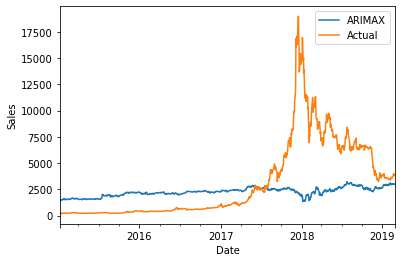

In [72]:


exog = train[[
                   'bitcoin_Price_prev_quarter', 
                   'bitcoin_Price_prev_month',
                   'bitcoin_Price_prev_week',
                   'bitcoin_Google_Trends', 
                   'googl_Price'
                   ]]
forecast =  arimax.predict( dynamic=True, exog=exog)
actual = train["bitcoin_Price"]

forecast.plot()
actual.plot()
plt.legend(['ARIMAX', 'Actual'])
plt.ylabel('Sales');



In [73]:
exog = valid[[
                   'bitcoin_Price_prev_quarter', 
                   'bitcoin_Price_prev_month',
                   'bitcoin_Price_prev_week',
                   'bitcoin_Google_Trends', 
                   'googl_Price'
                   ]].fillna(0)


In [74]:
forecast = arimax.get_forecast(steps=len(valid), exog=exog)

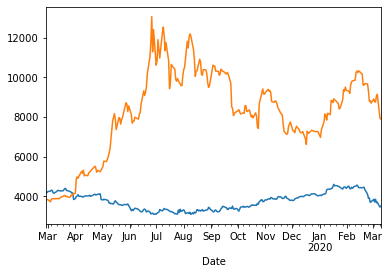

In [75]:
forecast.predicted_mean.plot()
valid["bitcoin_Price"].plot()

In [76]:
sqrt(mean_squared_error(forecast.predicted_mean, valid["bitcoin_Price"]))

5084.412573850238